## Covid-19 NLP Investigation - Drugs Sentiment Analysis
### Advanced Data Science Capstone Project by IBM/Coursera

Author: Siarhei Vasiaichau <br />
Date:   May 20, 2020

## Table of contents
1. [Introduction: Business Problem](#introduction)<br/>
2. [Data](#data)<br/>
3. [Methodology](#methodology)<br/>
4. [Analysis](#analysis)<br/>
    4.1 [Sentiment Analysis: Machine Learning](#sentiment_analysis)<br/>
    4.1.1 [Sentiment Model Selection](#sentiment_analysis_ms)<br/>
    4.2 [Sentiment Analysis: Deep Leaning](#sentiment_analysis_keras)<br/>
    4.3 [Covid-19 Drugs  Sentiment Analysis](#sentiment_analysis_drug)<br/>
    4.4 [Covid-19 Drugs Final Scores](#sentiment_analysis_final)<br/>
    4.5 [Covid-19 Drugs Final Scores WordCloud](#sentiment_analysis_wordcloud)<br/>
5. [Results and Discussion](#results)<br/>
6. [Conclusion](#conclusion)<br/>
7. [References](#references)<br/>

## 1.	Introduction: Business Problem <a name="introduction"></a>
### Background
&nbsp;&nbsp;&nbsp;&nbsp;Coronavirus disease 2019 (COVID-19) is an infectious disease caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). It was first identified in December 2019 in Wuhan, China, and has since spread globally, resulting in an ongoing pandemic. As of 15 May 2020, more than 4.53 million cases have been reported across 188 countries and territories, resulting in more than 307,000 deaths. More than 1.63 million people have recovered.

Common symptoms include fever, cough, fatigue, shortness of breath, and loss of smell and taste.While the majority of cases result in mild symptoms, some progress to acute respiratory distress syndrome (ARDS), multi-organ failure, septic shock, and blood clots.The time from exposure to onset of symptoms is typically around five days but may range from two to fourteen days.<br/>

### Problem description
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;According to the World Health Organization, <b>there are no available vaccines nor specific antiviral treatments for COVID-19</b>. On 1 May 2020, the United States gave Emergency Use Authorization to the antiviral <b>remdesivir</b> for people hospitalized with severe COVID‑19. Management involves the treatment of symptoms, supportive care, isolation, and experimental measures - https://en.wikipedia.org/wiki/Coronavirus_disease_2019 <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In this project we will try to analyze and find the most relevant drugs names mentioned in CORD-19 data coprus related to the treatment of COVID-19.<br/>

<b><i>Disclaimer: The results of this project is NOT a substitute for professional medical advice, diagnosis or treatment.</i></b>

### Target Audience
&nbsp;&nbsp;&nbsp;&nbsp;This investigation would interest anyone who interesting in COVID-19 therapy trends.

### Success Criteria
&nbsp;&nbsp;&nbsp;&nbsp;The success criteria of this project will be the Top-10 Drugs list mentioned in the articles related to the COVID-19 treamtent mentioned in the positive context.


## 2. Data  <a name="data"></a>
1) &nbsp;&nbsp;&nbsp;In our investigation we will use the "COVID-19 Open Research Dataset Challenge (**CORD-19**)" - https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge dataset.<br/> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;CORD-19 is a resource of over 63,000 scholarly articles, including over 51,000 with full text, about COVID-19, SARS-CoV-2, and related coronaviruses. This freely available dataset is provided to the global research community to apply recent advances in natural language processing and other AI techniques to generate new insights in support of the ongoing fight against this infectious disease. There is a growing urgency for these approaches because of the rapid acceleration in new coronavirus literature, making it difficult for the medical research community to keep up.<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The CORD-19 dataset represents the most extensive machine-readable coronavirus literature collection available for data mining to date. This allows the worldwide AI research community the opportunity to apply text and data mining approaches to find answers to questions within, and connect insights across, this content in support of the ongoing COVID-19 response efforts worldwide. There is a growing urgency for these approaches because of the rapid increase in coronavirus literature, making it difficult for the medical community to keep up.<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;This dataset was created by the Allen Institute for AI in partnership with the Chan Zuckerberg Initiative, Georgetown University’s Center for Security and Emerging Technology, Microsoft Research, and the National Library of Medicine - National Institutes of Health, in coordination with The White House Office of Science and Technology Policy.<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The licenses for each dataset can be found in the all _ sources _ metadata csv file.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **For this project we keep documents published in 2020 year only.**

2) &nbsp;&nbsp;&nbsp;We are going to extract Drugs' names from RxNav. RxNav is a browser for several drug information sources, including RxNorm and RxTerms. RxNav finds drugs in RxNorm from the names and codes in its constituent vocabularies. <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;With one exception, no license is needed to use any of the above APIs. The only exception is the /rxcui/{rxcui}/proprietary function in the RxNorm API, which requires the user to have a valid UMLS license and pass a proxy granting ticket as a parameter to the function. <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;RxNav, RxMix, RxClass and the RxNorm, RxTerms, Prescribable, RxClass, Interaction, RxCUI History and RxImage APIs are resources developed by the **National Library of Medicine** - https://rxnav.nlm.nih.gov/ContactUs.html

In [1]:
import pandas as pd
import os
import json
from operator import itemgetter
import nltk
import csv
csv.field_size_limit(2147483647)
#nltk.download('punkt')
import requests
import xml.etree.ElementTree as ET
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import string
from textblob import TextBlob
import codecs
import re
from shutil import copyfile
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sn
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestRegressor
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
from keras.utils import to_categorical
from keras import backend as K
from numpy import array
from numpy import asarray
from numpy import zeros
from wordcloud import WordCloud
from sklearn_deltatfidf import DeltaTfidfVectorizer

Using TensorFlow backend.


In [2]:
COVID19_FILES_DIR = 'F:/COVID19/Covid-19 May 16/'
COVID19_FILES_2020_DIR = 'f:\\COVID19\\Covid-19 May 16 2020  Filtered\\'
METADATA_FILENAME = COVID19_FILES_DIR + 'metadata.csv'
FILTERED_TEST_FILES_DIR = 'F:\\COVID19\\Covid-19 May 16 Filtered Test\\'
FORMATTED_FILES_DIR = 'F:\\COVID19\\Covid-19 May 16 Formatted\\'
RESULTS_FILE_NAME = 'Covid-19 Filtered May 16.csv'
DRUGS_FILE_NAME = 'RxNorm Drugs API.csv'
LABELED_SENTIMENT_FILE_NAME = 'F:\\COVID19\\Drun Sentiment labels.csv'
GLOVE_FILE_NAME = 'F:\\COVID19\\glove.6B.100d.txt'

### Read and process Metadatada file

In [3]:
%%html
<style>
table {float:left; font-size: 14px !important;}
</style>

In [4]:
df = pd.read_csv(METADATA_FILENAME, low_memory=False, parse_dates=['publish_time'])
df.shape

(63571, 18)

In [5]:
df['publish_time'].describe()

count                   63563
unique                   6897
top       2020-01-01 00:00:00
freq                      592
first     1951-03-12 00:00:00
last      2021-12-31 00:00:00
Name: publish_time, dtype: object

In [6]:
df.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url
0,zjufx4fo,b2897e1277f56641193a6db73825f707eed3e4c9,PMC,Sequence requirements for RNA strand transfer ...,10.1093/emboj/20.24.7220,PMC125340,11742998.0,green-oa,Nidovirus subgenomic mRNAs contain a leader se...,2001-12-17,"Pasternak, Alexander O.; van den Born, Erwin; ...",The EMBO Journal,NaN,NaN,NaN,document_parses/pdf_json/b2897e1277f56641193a6...,document_parses/pmc_json/PMC125340.xml.json,http://europepmc.org/articles/pmc125340?pdf=re...
1,ymceytj3,e3d0d482ebd9a8ba81c254cc433f314142e72174,PMC,"Crystal structure of murine sCEACAM1a[1,4]: a ...",10.1093/emboj/21.9.2076,PMC125375,11980704.0,green-oa,CEACAM1 is a member of the carcinoembryonic an...,2002-05-01,"Tan, Kemin; Zelus, Bruce D.; Meijers, Rob; Liu...",The EMBO Journal,NaN,NaN,NaN,document_parses/pdf_json/e3d0d482ebd9a8ba81c25...,document_parses/pmc_json/PMC125375.xml.json,http://europepmc.org/articles/pmc125375?pdf=re...
2,wzj2glte,00b1d99e70f779eb4ede50059db469c65e8c1469,PMC,Synthesis of a novel hepatitis C virus protein...,10.1093/emboj/20.14.3840,PMC125543,11447125.0,no-cc,Hepatitis C virus (HCV) is an important human ...,2001-07-16,"Xu, Zhenming; Choi, Jinah; Yen, T.S.Benedict; ...",EMBO J,NaN,NaN,NaN,document_parses/pdf_json/00b1d99e70f779eb4ede5...,document_parses/pmc_json/PMC125543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...
3,2sfqsfm1,cf584e00f637cbd8f1bb35f3f09f5ed07b71aeb0,PMC,Structure of coronavirus main proteinase revea...,10.1093/emboj/cdf327,PMC126080,12093723.0,green-oa,The key enzyme in coronavirus polyprotein proc...,2002-07-01,"Anand, Kanchan; Palm, Gottfried J.; Mesters, J...",The EMBO Journal,NaN,NaN,NaN,document_parses/pdf_json/cf584e00f637cbd8f1bb3...,document_parses/pmc_json/PMC126080.xml.json,http://europepmc.org/articles/pmc126080?pdf=re...
4,i0zym7iq,dde02f11923815e6a16a31dd6298c46b109c5dfa,PMC,Discontinuous and non-discontinuous subgenomic...,10.1093/emboj/cdf635,PMC136939,12456663.0,green-oa,"Arteri-, corona-, toro- and roniviruses are ev...",2002-12-01,"van Vliet, A.L.W.; Smits, S.L.; Rottier, P.J.M...",The EMBO Journal,NaN,NaN,NaN,document_parses/pdf_json/dde02f11923815e6a16a3...,document_parses/pmc_json/PMC136939.xml.json,http://europepmc.org/articles/pmc136939?pdf=re...


### Keep articles for 2020 year only and having file links - pdf_json_files or pmc_json_files

In [7]:
df_2020 = df[(df['publish_time'] >= '2020-01-01') & (df['publish_time'] < pd.to_datetime('now'))]
df_2020.shape

(12956, 18)

In [8]:
# Remove records without file links
df_2020_wfiles = df_2020.dropna(subset=['pdf_json_files', 'pmc_json_files'], how='all')
df_2020_wfiles.shape

(10223, 18)

In [9]:
df_2020_wfiles.describe(include='all')

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url
count,10223,10049,10223,10221,9340,3150,2.443000e+03,10223,7205,10223,10152,6425,4.710000e+02,679,890,10049,2771,8260
unique,10221,10048,20,10093,9338,3150,NaN,15,7173,132,9912,1563,NaN,679,890,10048,2771,8260
top,j3b964oz,58be092086c74c58e9067121a6ba4836468e7ec3,Elsevier,Antihypertensive drugs and risk of COVID-19?,10.1097/jcma.0000000000000270,PMC7002373,NaN,els-covid,Fast testing can help mitigate the coronavirus...,2020-04-30 00:00:00,"Augoustides, John G.",Journal of Infection,NaN,#6460,2003.09032,document_parses/pdf_json/58be092086c74c58e9067...,document_parses/pmc_json/PMC7128205.xml.json,https://doi.org/10.1101/2020.04.03.20052936
freq,2,2,3365,3,2,1,NaN,3799,3,387,7,117,NaN,1,1,2,1,1
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,3.216545e+07,NaN,NaN,NaN,NaN,NaN,2.761645e+09,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,1.762798e+05,NaN,NaN,NaN,NaN,NaN,4.535992e+08,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,3.055286e+07,NaN,NaN,NaN,NaN,NaN,3.912630e+07,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,3.209104e+07,NaN,NaN,NaN,NaN,NaN,2.748444e+09,NaN,NaN,NaN,NaN,NaN


### Select files for analysis  - PMC files first then PDF files

Select PMC JSON files first as more clearly parsed

In [10]:
pmc_files = df_2020_wfiles[df_2020_wfiles['pmc_json_files'].notnull()]['pmc_json_files'].to_list()
len(pmc_files)

2771

Select PDF JSON files

In [11]:
pdf_files_df =  df_2020_wfiles[df_2020_wfiles['pmc_json_files'].isnull()]
pdf_files_df = pdf_files_df.dropna(subset=['pdf_json_files'])
pdf_files = pdf_files_df['pdf_json_files'].to_list()
len(pdf_files)

7452

*pdf_json_files* column may contain several file names joined by ; - split such strings <br/>
Split PDF JSON file names

In [12]:
files_for_analysis = pmc_files + pdf_files
files_for_analysis_splitted = [y for x in files_for_analysis for y in x.split(';')]
print(len(files_for_analysis_splitted))
files_for_analysis = ['{0}{1}'.format(COVID19_FILES_DIR, element.strip()) for element in files_for_analysis_splitted]
print(len(files_for_analysis))
print(files_for_analysis[:5])

10258
10258
['F:/COVID19/Covid-19 May 16/document_parses/pmc_json/PMC6924889.xml.json', 'F:/COVID19/Covid-19 May 16/document_parses/pmc_json/PMC6924891.xml.json', 'F:/COVID19/Covid-19 May 16/document_parses/pmc_json/PMC6924894.xml.json', 'F:/COVID19/Covid-19 May 16/document_parses/pmc_json/PMC6924913.xml.json', 'F:/COVID19/Covid-19 May 16/document_parses/pmc_json/PMC6938705.xml.json']


In [13]:
## Copy 2020 year files into seperate folder 
#files_2020 = {}
#for file in files_for_analysis:
#    head, tail = os.path.split(file)
#    copyfile(file, COVID19_FILES_2020_DIR + tail)

Define publication date

In [14]:
df_metadata_date = df_2020_wfiles[['sha', 'pmcid', 'publish_time']]
df_metadata_date.head()

,sha,pmcid,publish_time
12171,3dfce0f1586b904eb6afcda376c0295d3de6c295,PMC6924889,2020-01-12
12172,7d102f0d9bd25cf5ac225ae0312a2f6c66f4b9a5,PMC6924891,2020-01-12
12173,05326cc45fa2898c5850df85d30dad3d2c82acef; 5147...,PMC6924894,2020-01-12
12174,724be3f77bbbdcc7e73de43f4cfe22335ffb9ef9; 11a2...,PMC6924913,2020-01-12
12211,a4490fc5ca8fea133b9a5beb9258df89cf4945b6,PMC6938705,2020-01-01


Define publication date for each PMC and PDF files

In [15]:
sha_list = dict(zip(df_metadata_date['sha'], df_metadata_date['publish_time']))
sha_list_s ={} 
for key, value in sha_list.items():
        try:    
          strs = key.split(';')
          if len(strs) > 1:
           for i in strs:
               sha_list_s[i.strip()] = value
          else:
           sha_list_s[key] = value
        except:
            continue
    
pmcid_list = dict(zip(df_metadata_date['pmcid'], df_metadata_date['publish_time']))

In [16]:
def get_publish_date(paper_id):
    if paper_id in sha_list_s:
        return sha_list_s.get(paper_id)
    if paper_id in pmcid_list:
        return pmcid_list.get(paper_id)

### Create Cleaned CSV file with  Document ID, Authors, Publication date, Abstract Text and Full Text

In [17]:
# Normalize Authors 
def format_authors(json_data):
    result =""
    for author in json_data:
        if len(author['suffix']) == 0:
            if len(result) > 0:
                result = result + "; " + author['first'] + ' ' + author['last']
            else:
                result = author['first'] + ' ' + author['last']
        else:
             if len(result) > 0:
                result = result + "; " + author['first'] + ' ' + author['suffix'] + ' ' + author['last']
             else:
                result = author['first'] + ' ' + author['suffix'] + ' ' + author['last']
    return result

Combine Full text body and make CSV file

In [18]:
csv_modified = []
sections = []
for filename in files_for_analysis:
        row = {"paper_id": None, "publish_date": None, "title": None, 'authors': None, "abstract": None, "text": None}
        with open(filename) as json_file:
            json_data = json.load(json_file)
            row['paper_id'] = json_data['paper_id']
            row['publish_date'] = get_publish_date(json_data['paper_id'])
            row['title'] = json_data['metadata']['title']     
            row['authors'] = format_authors(json_data['metadata']['authors'])
            # abstracts
            try:
                abstracts = [a['text'] for a in json_data['abstract']]
            except KeyError:
                abstracts = None
            if abstracts:
                abstract = "\n".join(abstracts)
                row['abstract'] = abstract
            else:
                row['abstract'] = ''
            
            # main text with sections
            texts = [(body['section'], body['text']) for body in json_data['body_text']]           
            texts_summary = {body['section']: "" for body in json_data['body_text']}
            for section, text in texts:
                texts_summary[section] += text
                sections.append(section)
            body = ""
            for section, text in texts_summary.items():
                body += section
                body += "\n"
                body += text
                body += "\n\n"
            row['text'] = body
        csv_modified.append(row)            

Clean duplicates by Publish date, Authors, Title and Abstract text

In [19]:
df_results = pd.json_normalize(csv_modified)
df_2020_clean_results = df_results.drop_duplicates(['publish_date','authors', 'title', 'abstract'])
df_2020_clean_results.describe(include='all')

,paper_id,publish_date,title,authors,abstract,text
count,9812,9812,9812,9812,9812,9812
unique,9812,132,8859,9132,4559,9785
top,0bd443591b5e10934beef050b516afeca6b668fe,2020-04-30 00:00:00,,,,"Disclosures\nThe authors have no personal, fin..."
freq,1,365,679,384,5179,6
first,NaN,2020-01-01 00:00:00,NaN,NaN,NaN,NaN
last,NaN,2020-05-20 00:00:00,NaN,NaN,NaN,NaN


Clean duplicates by Full text

In [20]:
df_2020_results = df_2020_clean_results.drop_duplicates(['text'])
df_2020_results.describe(include='all')

,paper_id,publish_date,title,authors,abstract,text
count,9785,9785,9785,9785,9785,9785
unique,9785,132,8838,9114,4557,9785
top,0bd443591b5e10934beef050b516afeca6b668fe,2020-04-30 00:00:00,,,,\nproduced when an infected person sneezes and...
freq,1,365,677,383,5157,1
first,NaN,2020-01-01 00:00:00,NaN,NaN,NaN,NaN
last,NaN,2020-05-20 00:00:00,NaN,NaN,NaN,NaN


In [21]:
df_2020_results.shape

(9785, 6)

In [22]:
df2020_doc = df_2020_results['publish_date'].groupby([df_2020_results['publish_date'].dt.month]).agg('count').reset_index(name="count")
df2020_doc.rename(columns={'publish_date':'Month'}, inplace=True)

Lets inspect the number of publications in our dataset by month

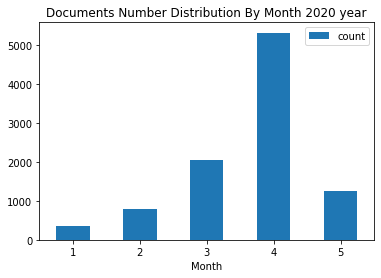

In [23]:
df2020_doc.plot.bar(x = "Month", y = "count", title="Documents Number Distribution By Month 2020 year", rot=0)
plt.show(block=True);

As we can see the most documents were published in April.

Save resulting CSV file

In [24]:
df_2020_results.to_csv(FORMATTED_FILES_DIR + RESULTS_FILE_NAME, index=False, encoding='utf-8')

### Read Drugs data from RxNav Rest API

Get drugs names from RxNav Rest API <br/>
uses term types (TTYs)
- IN - Ingredient. A compound or moiety that gives the drug its distinctive clinical properties. Ingredients generally use the United States Adopted Name (USAN). E.g. *Fluoxetine*
- BN - Brand Name. A proprietary name for a family of products containing a specific active ingredient. E.g. *Prozac*

In [25]:
RXNORM_IN_URL = 'https://rxnav.nlm.nih.gov/REST/allconcepts?tty=IN'
RXNORM_BN_URL = 'https://rxnav.nlm.nih.gov/REST/allconcepts?tty=BN'

In [26]:
response_in = requests.get(RXNORM_IN_URL)
tree_in = ET.fromstring(response_in.content)
response_bn = requests.get(RXNORM_BN_URL)
tree_bn = ET.fromstring(response_bn.content)

In [27]:
drugs_list = []
# Find names
for Variable in tree_in.findall('*//name'):
        drugs_list.append(Variable.text)
print("Length = ", len(drugs_list))

Length =  12587


In [28]:
for Variable in tree_bn.findall('*//name'):
        drugs_list.append(Variable.text)
print("Length = ", len(drugs_list))

Length =  18176


Create a set of Drugs names (unique)

In [29]:
drugs_unique = list(set(drugs_list))
drugs_unique.sort()

Save drugs to file

In [30]:
with open(FORMATTED_FILES_DIR + DRUGS_FILE_NAME, "w") as outfile:
    outfile.write("\n".join(drugs_unique))

## 3. Methodology<a name="methodology"></a>

In this project we are trying to find drugs names with most positive sentiments among all documents from **CORD-19** corpus mentioned in the nearest two sentences from the sentence with *Covid-19* and *Covid-19* synonyms phrases. 

In the **first step** we have collected the following data: 
- CORD-19 documents filtered by publication date equal 2020 year - **9785** documents; 
- Drugs names from https://rxnav.nlm.nih.gov/ - **18176** unique entries comprise drugs' Ingridient and Brand names;

Downloading files from https://www.nlm.nih.gov site requires UMLS Licence. So I used RxNav Rest API - less accurate results related Drugs names because the results can contain such entries as 'gold', 'latex', 'fiber' - I removed them in cleanup phase. <br/>

There are other sources of notmalized Drugs names, e.g. https://www.drugbank.ca/, but they also requires Licence to access/download the data.<br/> 
I asked *Drugbank* for the acces but they have not provided it without the explanation, unfortunately.

The **second step** in our analysis will extract sentences with *Covid-19* and Drugs names (with distance of 2 sentences from each other) and calculate statistics about drugs names distribution in each document.

In the **third step** we will choose NLP Sentiment analysis Model with the highest accuracy.<br/>
The problem here that all existing Sentiment models pre-trained on social media datasets (tweets, movie/hotels reviews). <br/>
I have not found any Sentiment labeled dataset for Medical domain. <br/>
So I randomly chose 500 sentences from **CORD-19** corpus and labeled them. <br/>
*I am not a doctor so may be some sentences labeled wrongly.*
 
In the **fourth and final step** we will calculate the summary score for each drug (Sentiment - negative (-1), neutral (0), and positive (1))<br/> and display the Top-20 Drugs Names on WordCloud chart.

## 4. Analysis <a name="analysis"></a>

In this section, we will explore the cleansed data and visualize them.



Synonyms of COVID-19

In [31]:
covid_names = [
    "covid-19",
    "covid19",
    "2019-ncov",
    "2019ncov",
    "coronavirus",
    "sars-cov-2",
    "sarscov2"]

Read our previosuly created 'Result Cleaned' CSV file with Full Text articles from 2020 year

In [32]:
csv_results = []
with codecs.open(FORMATTED_FILES_DIR + RESULTS_FILE_NAME,'r', encoding='utf-8')as f:
     csv_results = list(csv.reader(f))

print("CSV Results file size = ", len(csv_results))        

CSV Results file size =  9786


In [33]:
print(csv_results[0])

['paper_id', 'publish_date', 'title', 'authors', 'abstract', 'text']


Create a dictionary of sentences for each document

In [34]:
all_sentences = {}
for i, record in enumerate(csv_results, start=1):
    sentences = []
    # get full text
    # add additional spaces arounf dots to improve sentence
    full_text =  re.sub(r'([a-z])\.([A-Z])', r'\1. \2', record[5])
    full_text =  re.sub(r'([a-z])\.([0-9])', r'\1. \2', full_text)
    full_text =  re.sub(r'([0-9]\])\.([A-Z])', r'\1. \2', full_text)
    full_text =  re.sub(r'([0-9]\))\.([A-Z])', r'\1. \2', full_text)   
    sent_text = nltk.sent_tokenize(full_text) 
    for sentence in sent_text:
        #remove New Line from the file
        str1 = sentence.replace("\n", "")
        sentences.append(str1)    
    all_sentences[record[0]] = sentences
print("All documents number: ", len(all_sentences))                            

All documents number:  9786


So we have 9786 document with publish date equal 2020 year

#### Normalize words (lowercase and remove stop words)

In [35]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gmlvsv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

We are using pre-defined Stop words list from NLTK library and manually add some stop words for the drugs names.

In [36]:
stop_words = stopwords.words('english')
drugs_stop_words = ['rna', 'lead', 'air', 'oxygen', 'perform', 'water', 'diamond', 'matrix', 'gold', 'today',
                   'sodium', 'blockade', 'align', 'copper', 'excel','calcium', 'nicotine', 'iron',
                   'latex', 'fiber', 'legacy', 'formalin', 'tomorrow', 'formaldehyde', 'methanol',
                   'pronto', 'android','longrange', 'overtime','acetone','revolution',
                   'glucose', 'ethanol', 'cocaine','heroin', 'supreme', 'zinc', 'pacebo', 'glycine',
                   'poliovirus', 'protease']

Remove noise: punctuation, stop words and lowercase all words. <br/>
I decided not to use Lemmatizer because we are going to use Drugs Names for search (not common English words)

In [37]:
def remove_noise(tokens, stop_words = ()):
    cleaned_tokens = []
    for token in tokens:
#        lemmatizer = WordNetLemmatizer()
#        token = lemmatizer.lemmatize(token)
        if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

#### Define sentences with 'COVID-19' and synonyms 

In [38]:
#Define sentences' indexes with Covid-19 mentioned
#Iterate Documents
covid19_sentences_indexes = {}
for key, doc in all_sentences.items():
    #Iterate Sentences in document
    for i, sentence in enumerate(doc):
         tokenized_text = nltk.word_tokenize(sentence)
         #lowercase all words from the sentence
         words_lower = [item.lower() for item in tokenized_text]
         if any(word in words_lower for word in covid_names):          
            if key not in covid19_sentences_indexes:
                 covid19_sentences_indexes[key] = [i]
            else:
                 covid19_sentences_indexes[key].append(i)
                
# Number of sentences with Covid-19 mentioned
print("Number of Documents with Covid-19 mentioned: ", len(covid19_sentences_indexes))    

Number of Documents with Covid-19 mentioned:  8834


Lowercase all drugs names and add 'Arbidol' because it absent in RxNorm  database.

In [39]:
#lowercase all drugs
drugs_unique_lower = [item.lower() for item in drugs_unique]
#remove stop words
drugs_unique_lower_wstop = list(filter(lambda w: w not in drugs_stop_words, drugs_unique_lower))
drugs_unique_lower_wstop.append('arbidol')

#### Define sentences with Drugs mentioned nearest the 'Covid-19' sentenses

In [40]:
windows_size = 2
drugs_sentences_indexes = {}
#Iterate thru Documents
for key, s_indexes in covid19_sentences_indexes.items():
    passed_indexes = []
    for i, index in enumerate(s_indexes):
    #check current sentence and windows_size ahead sentences for Drugs
        for j in range(windows_size):
            current_index = index + j
            if current_index >= len(all_sentences[key]):
                continue
            current_sentence = all_sentences[key][current_index]
            tokenized_text = nltk.word_tokenize(current_sentence)
            #lowercase all words from the sentence and clear noise
            #words_lower = [item.lower() for item in tokenized_text]
            tokens_cleaned = remove_noise(tokenized_text, stop_words)
            # check Drugs
            if (current_index not in passed_indexes) & (any(word in tokens_cleaned for word in drugs_unique_lower_wstop)):
                   if key not in drugs_sentences_indexes:
                        drugs_sentences_indexes[key] = [current_index]
                   else:
                        drugs_sentences_indexes[key].append(current_index)                        
                   passed_indexes.append(current_index)

# Number of sentences with drugs mentioned
print("Number of sentences with drugs mentioned: ", len(drugs_sentences_indexes))      


Number of sentences with drugs mentioned:  1820


So now we have only 1820 documents with 'Covid-19' and Drug Names listed nearby (2 sentences distance)

In [41]:
# Create a file with Drugs and nearby Coronavirus sentences
drugs_sentences_result ={}
all_drug_sentences = []
for key, s_indexes in drugs_sentences_indexes.items():
     for i, index in enumerate(s_indexes):
            current_sentence = all_sentences[key][index]     
            all_drug_sentences.append(current_sentence)
            if key not in drugs_sentences_result:
                drugs_sentences_result[key] = [current_sentence]
            else:
                drugs_sentences_result[key].append(current_sentence)

Save the file with Drugs and neaby Coronavirus sentences

In [42]:
df_results_drugs = pd.json_normalize(drugs_sentences_result)
df_results_drugs_tr = df_results_drugs.transpose()
df_results_drugs_tr.head()

,0
PMC6955270,"[Other avian gammacoronaviruses, including gui..."
PMC7026129,[It was reported that hexachlorophene inhibite...
PMC7054919,[Cleavage of the Coronavirus S protein by tryp...
PMC7063555,"[However, many forms of specific treatment are..."
PMC7077318,[The coronavirus 3CLpro employs conserved cyst...


In [43]:
import random
random.shuffle(all_drug_sentences)
df_results_drugs_tr.to_csv(FORMATTED_FILES_DIR + "Drugs Sentence.csv",  encoding='utf-8')
with codecs.open(FORMATTED_FILES_DIR + "Drugs Sentences All.csv",'w', encoding='utf-8')as f:
     f.write("\n".join(all_drug_sentences))

## 4.1 Sentiment Analysis: Machine Learning  <a name="sentiment_analysis"></a>

Now we are going to evaluate and choose the best NLP Sentiment Analysis Model for our Drug/Treatment usage (limited to this project).

#### Read and Analyze manually Labeled 500 Covid-19 sentences with drugs mentioned in them
Sentiment classes defined as follows
* 0 - negative
* 2 - neutral
* 4 - positive

These classes show the sentiment about the drugs treatment of Covid-19. <br/> <br/>
**Labeling was done by me (I am not a doctor) so may be some sentences labeled wrongly because it's hard to understand the writing somethimes.**

In [44]:
df_sentiment = pd.read_csv(LABELED_SENTIMENT_FILE_NAME)
df_sentiment.head()

,label,sentence
0,2,"However, it is not clear whether the anti-viru..."
1,0,"However, the use of ribavirin is associated wi..."
2,4,"According to preliminary reports [50 , 51] fro..."
3,4,"Notably, inhibition of mTOR with sirolimus red..."
4,2,"Chlorpromazine, an antipsychotic (via dopamine..."


In [45]:
def label_category(score):
    return 'positive' if score ==4  else 'negative' if score == 0 else 'neutral' 

In [46]:
# Assign label to sentiment categories
df_sentiment['true_label'] = df_sentiment['label'].apply(label_category)
df_sentiment.head()

,label,sentence,true_label
0,2,"However, it is not clear whether the anti-viru...",neutral
1,0,"However, the use of ribavirin is associated wi...",negative
2,4,"According to preliminary reports [50 , 51] fro...",positive
3,4,"Notably, inhibition of mTOR with sirolimus red...",positive
4,2,"Chlorpromazine, an antipsychotic (via dopamine...",neutral


Check how balanced our labeled dataset. <br/>

In [47]:
dfc= df_sentiment.groupby(['true_label'])['true_label'].count().reset_index(name="count")
dfc

,true_label,count
0,negative,87
1,neutral,179
2,positive,234


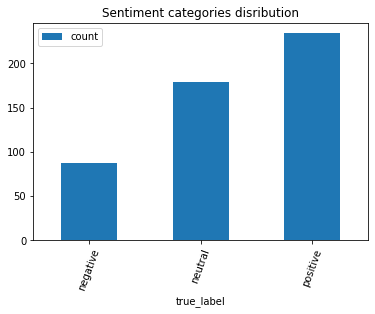

In [48]:
dfc.plot.bar(x = "true_label", y = "count", rot=70, title="Sentiment categories disribution");
plt.show(block=True);

We can see that we have almost 3 times more 'Positive' labeled sentences than 'Negative'

### 4.1.1 Sentiment NLP Model selection   <a name="sentiment_analysis_ms"></a>
Now we will evaluate the three supervived **Machine Learning Algorithms** for Classsification: <br/>

1) Vader<br/>
2) TextBlob<br/>
3) SVM


and one **Deep Learning Algorithm** - Multi-Label classification on Keras

*Note: based on these documents in part of Sentimental Models build and check performance*
- https://towardsdatascience.com/fine-grained-sentiment-analysis-in-python-part-1-2697bb111ed4
- https://stackabuse.com/python-for-nlp-creating-multi-data-type-classification-models-with-keras/


### Vader Sentiment Analysis
VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. <br/>


In [49]:
vader = SentimentIntensityAnalyzer()

In [50]:
def vader_score(text):
        return vader.polarity_scores(text)['compound']
    
def vader_category(score):
        return 'positive' if score > 0 else 'negative' if score < 0 else 'neutral' 

In [51]:
df_sentiment_vader = df_sentiment.copy()
df_sentiment_vader['score'] = df_sentiment_vader['sentence'].apply(vader_score)
df_sentiment_vader['prediction'] = df_sentiment_vader['score'].apply(vader_category)
df_sentiment_vader = df_sentiment_vader.drop('score', axis=1)
df_sentiment_vader = df_sentiment_vader.drop('label', axis=1)
df_sentiment_vader

,sentence,true_label,prediction
0,"However, it is not clear whether the anti-viru...",neutral,negative
1,"However, the use of ribavirin is associated wi...",negative,positive
2,"According to preliminary reports [50 , 51] fro...",positive,negative
3,"Notably, inhibition of mTOR with sirolimus red...",positive,negative
4,"Chlorpromazine, an antipsychotic (via dopamine...",neutral,negative
...,...,...,...
495,Tocilizumab is known to improve insulin resist...,positive,positive
496,Remdesivir is now being tested in several clin...,neutral,positive
497,This analysis provides a rational dose optimis...,neutral,positive
498,Both servers predictions were consistent and p...,neutral,neutral


In [52]:
y_true = df_sentiment_vader['true_label']
y_pred = df_sentiment_vader['prediction']

#### Calcuate model performace for Vader classification

In [53]:
results = confusion_matrix(y_true, y_pred) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(y_true, y_pred)) 
print('Report : ')
print(classification_report(y_true, y_pred))

Confusion Matrix :
[[ 52  12  23]
 [ 57  66  56]
 [ 62  50 122]]
Accuracy Score : 0.48
Report : 
              precision    recall  f1-score   support

    negative       0.30      0.60      0.40        87
     neutral       0.52      0.37      0.43       179
    positive       0.61      0.52      0.56       234

    accuracy                           0.48       500
   macro avg       0.48      0.50      0.46       500
weighted avg       0.52      0.48      0.49       500



#### Display Confusion Matrix for Vader classification

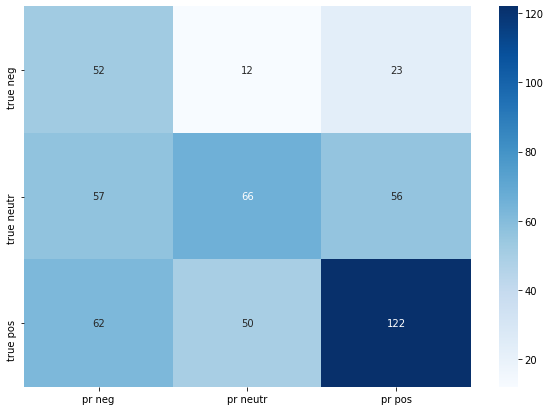

In [54]:
df_cm = pd.DataFrame(results, index = ['true neg', 'true neutr', 'true pos'], columns = ['pr neg', 'pr neutr', 'pr pos'])
plt.figure(figsize = (10,7))
ax = sn.heatmap(df_cm, cmap='Blues', annot=True, fmt='d')

**As we can see the accuracy is low - equal just random choice**

### Summary table


| Algorithm | Accuracy | F1 Macro         
| - |------------- | -
| Vader | 0.48 | 0.46



### TextBlob Sentiment Analysis
TextBlob is a popular Python library for processing textual data. It is built on top of NLTK, another popular Natural Language Processing toolbox for Python. <br/>
TextBlob uses a sentiment lexicon (consisting of predefined words) to assign scores for each word, which are then averaged out using a weighted average to give an overall sentence sentiment score. <br/>
Three scores: “polarity”, “subjectivity” and “intensity” are calculated for each word. <br/>
We are interested only in “polarity”: <br/>
&nbsp;&nbsp;&nbsp;negative vs. positive (-1.0 => +1.0) <br/> 

In [55]:
def textblob_score(text):
        return TextBlob(text).sentiment.polarity
    
def textblob_category(score):
        return 'positive' if score > 0 else 'negative' if score < 0 else 'neutral' 

In [56]:
df_sentiment_textblob = df_sentiment.copy()
df_sentiment_textblob['score'] = df_sentiment_textblob['sentence'].apply(textblob_score)
df_sentiment_textblob['prediction'] = df_sentiment_textblob['score'].apply(textblob_category)
df_sentiment_textblob = df_sentiment_textblob.drop('score', axis=1)
df_sentiment_textblob = df_sentiment_textblob.drop('label', axis=1)
df_sentiment_textblob.head()

,sentence,true_label,prediction
0,"However, it is not clear whether the anti-viru...",neutral,negative
1,"However, the use of ribavirin is associated wi...",negative,positive
2,"According to preliminary reports [50 , 51] fro...",positive,positive
3,"Notably, inhibition of mTOR with sirolimus red...",positive,positive
4,"Chlorpromazine, an antipsychotic (via dopamine...",neutral,positive


#### Calcuate model performace for TextBlob classification

In [57]:
y_true = df_sentiment_textblob['true_label']
y_pred = df_sentiment_textblob['prediction']

In [58]:
results = confusion_matrix(y_true, y_pred) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(y_true, y_pred)) 
print('Report : ')
print(classification_report(y_true, y_pred))

Confusion Matrix :
[[ 25  27  35]
 [ 37  74  68]
 [ 23  84 127]]
Accuracy Score : 0.452
Report : 
              precision    recall  f1-score   support

    negative       0.29      0.29      0.29        87
     neutral       0.40      0.41      0.41       179
    positive       0.55      0.54      0.55       234

    accuracy                           0.45       500
   macro avg       0.42      0.41      0.41       500
weighted avg       0.45      0.45      0.45       500



#### Display Confusion Matrix for TextBlob classification

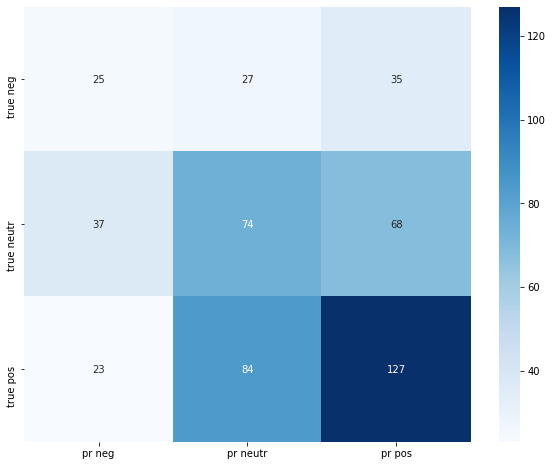

In [59]:
df_cm = pd.DataFrame(results, index = ['true neg', 'true neutr', 'true pos'], columns = ['pr neg', 'pr neutr', 'pr pos'])
plt.figure(figsize = (10, 8))
ax = sn.heatmap(df_cm, cmap='Blues', annot=True, fmt='d')

**The results for TextBlob are worse than we saw for the Vader classifier**

### Summary table


| Algorithm | Accuracy | F1 Macro         
| - |------------- | -
| Vader | 0.48 | 0.46
| TextBlob | 0.45 | 0.41


### Support Vector Machine Sentiment Analysis
Let's try another popular supervised learning algorithm for the classification - SVM. <br/>

*SVM is a non-probabilistic model which uses a representation of text examples as points in a multidimensional space. Examples of different categories (sentiments) are mapped to distinct regions within that space. Then, new texts are assigned a category based on similarities with existing texts and the regions they’re mapped to.* <br/>
https://monkeylearn.com/blog/introduction-to-support-vector-machines-svm/

In [60]:
df_sentiment_svm = df_sentiment.copy()

Split original labeled dataframe into test and train sets. <br/>


In [61]:
train_df, test_df = train_test_split(df_sentiment_svm, test_size=0.3, random_state=42)
train_df.head()

,label,sentence,true_label
5,4,Hydroxychloroquine (HCQ) has emerged as a cont...,positive
116,4,"In order to verify whether targeted IL-6, may ...",positive
45,4,his analysis provides a rational dose optimisa...,positive
16,2,Hydroxychloroquine was started with the same d...,neutral
462,4,"A rapid influenza test, conducted simultaneous...",positive


#### Transforming words to features 
To transform the text into features, <br/>

 1) We use CountVectorizer to convert all sentences of our training data into a matrix of token counts; <br/>
 2) Next, the count matrix is converted to a TF-IDF representation; <br/>
 3) A hinge loss function with a stochastic gradient descent (SGD) optimizer is used, and L2 regularization is applied during training. <br/> 
 <br/>


In [79]:
pipeline = Pipeline([
                     ('count', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', SGDClassifier(
                                   loss='hinge',
                                   penalty='l2',
                                   alpha=1e-3,
                                   random_state=42,
                                   max_iter=200,
                                   learning_rate='optimal',
                                   tol=None,
                      )),
                    ])

svm_learner = pipeline.fit(train_df['sentence'], train_df['true_label'])
test_df['prediction'] = learner.predict(test_df['sentence'])

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


#### Calcuate model performace for SVM classification

In [80]:
y_true = test_df['true_label']
y_pred = test_df['prediction']
results = confusion_matrix(y_true, y_pred) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(y_true, y_pred)) 
print('Report : ')
print(classification_report(y_true, y_pred))

Confusion Matrix :
[[15  6  8]
 [ 8 29 16]
 [ 3 12 53]]
Accuracy Score : 0.6466666666666666
Report : 
              precision    recall  f1-score   support

    negative       0.58      0.52      0.55        29
     neutral       0.62      0.55      0.58        53
    positive       0.69      0.78      0.73        68

    accuracy                           0.65       150
   macro avg       0.63      0.61      0.62       150
weighted avg       0.64      0.65      0.64       150



#### Display Confusion Matrix for SVM classification

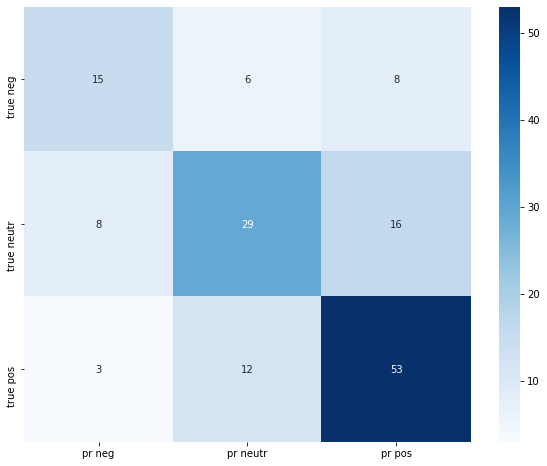

In [81]:
df_cm = pd.DataFrame(results, index = ['true neg', 'true neutr', 'true pos'], columns = ['pr neg', 'pr neutr', 'pr pos'])
plt.figure(figsize = (10,8))
ax = sn.heatmap(df_cm, cmap='Blues', annot=True, fmt='d')

**The results for SVM are better than TextBlob and Vader** <br/>

A count vectorizer combined with a TF-IDF transformation does not really learn anything about how words are related to one another — they simply look at the number of word co-occurrences in the each sample to make a conclusion. Enter word embeddings. <br/>
https://towardsdatascience.com/fine-grained-sentiment-analysis-in-python-part-1-2697bb111ed4

* Delta TF-IDF transformation also could be used but after testing I saw a degradation in accuracy so I kept TF-IDF transformation.
* N-grams (1,2) or (2,2) in CountVectorizer() also lead to accuracy decrease.

### Summary table


| Algorithm | Accuracy | F1 Macro         
| - |------------- | -
| Vader | 0.49 | 0.48
| TextBlob | 0.43 | 0.39
| SVM | 0.65 | 0.62


## 4.2 Sentiment Analysis: Deep Leaning   <a name="sentiment_analysis_keras"></a>

Let's build a simple Keras Model and check it's accuracy

In [65]:
df_sentiment_keras = df_sentiment.copy()
df_sentiment_keras

,label,sentence,true_label
0,2,"However, it is not clear whether the anti-viru...",neutral
1,0,"However, the use of ribavirin is associated wi...",negative
2,4,"According to preliminary reports [50 , 51] fro...",positive
3,4,"Notably, inhibition of mTOR with sirolimus red...",positive
4,2,"Chlorpromazine, an antipsychotic (via dopamine...",neutral
...,...,...,...
495,4,Tocilizumab is known to improve insulin resist...,positive
496,2,Remdesivir is now being tested in several clin...,neutral
497,2,This analysis provides a rational dose optimis...,neutral
498,2,Both servers predictions were consistent and p...,neutral


Change labels to continues labels - 0,1,2 

In [66]:
df_sentiment_keras['label'] = df_sentiment_keras['true_label'].map({'neutral': 1, 'positive': 2, 'negative': 0})
df_sentiment_keras.head()

,label,sentence,true_label
0,1,"However, it is not clear whether the anti-viru...",neutral
1,0,"However, the use of ribavirin is associated wi...",negative
2,2,"According to preliminary reports [50 , 51] fro...",positive
3,2,"Notably, inhibition of mTOR with sirolimus red...",positive
4,1,"Chlorpromazine, an antipsychotic (via dopamine...",neutral


Split data on test (30%) and training (70%) sets

In [67]:
X_train, X_test, y_train, y_test = train_test_split(df_sentiment_keras['sentence'], df_sentiment_keras['label'], test_size=0.3, random_state=42)

Textual data has to be converted into numeric form before it can be used by deep learning models. <br/>
One way to convert text to numbers is via word embeddings.
In word embeddings, every word is represented as an n-dimensional dense vector. <br/> 
The words that are similar will have similar vector. Word embeddings techniques such as GloVe and Word2Vec have proven to be extremely efficient for converting words into corresponding dense vectors. The vector size is small and none of the indexes in the vector is actually empty. <br/>

The first step in word embeddings is to convert the words into thier corresponding numeric indexes. <br/> 
Sentences can have different lengths, and therefore the sequences returned by the Tokenizer class also consist of variable lengths. <br/>
We specify that maximum length of the sequence will be 300. For the sentences having length less than 300, the remaining indexes will be padded with zeros. For the sentences having length greater than 300, the remaining indexes will be truncated.

In [68]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_df['sentence'])

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 300

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

Next, we need to load the built-in GloVe word embeddings. <br/>
Finally, we will create an embedding matrix where rows will be equal to the number of words in the vocabulary (plus 1). <br/> 
The number of columns will be 100 since each word in the GloVe word embeddings that we loaded is represented as a 100 dimensional vector.

In [69]:
embeddings_dictionary = dict()
glove_file = open(GLOVE_FILE_NAME, encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

We will create a very simple model with one input layer (embedding layer), one LSTM layer with 128 neurons and one dense layer that will act as the output layer as well. <br/>
Since we have 3 possible outputs, the number of neurons will be 3 and the activation function will be softmax. <br/>
We will use the categorical_crossentropy as our loss function and adam as the optimization function.

In [70]:
variables_for_classification = 3
epochs = 10
batch_size = 28

deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(128)(embedding_layer)
dense_layer_1 = Dense(variables_for_classification, activation='sigmoid')(LSTM_Layer_1)
model = Model(inputs=deep_inputs, outputs=dense_layer_1)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
print(model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 300)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 300, 100)          261900    
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 387       
Total params: 379,535
Trainable params: 117,635
Non-trainable params: 261,900
_________________________________________________________________
None


Convert labels to_categorical 

In [71]:
train_labels = to_categorical(y_train, num_classes=variables_for_classification)

Train our model

In [72]:
history = model.fit(X_train, train_labels, epochs=epochs, batch_size=batch_size,validation_split=0.2, verbose=1, )

Train on 280 samples, validate on 70 samples
Epoch 1/10
280/280 [==============================] - 3s 10ms/step - loss: 0.6751 - acc: 0.6667 - val_loss: 0.5845 - val_acc: 0.6667
Epoch 2/10
280/280 [==============================] - 2s 7ms/step - loss: 0.6128 - acc: 0.6667 - val_loss: 0.5741 - val_acc: 0.6667
Epoch 3/10
280/280 [==============================] - 2s 7ms/step - loss: 0.6075 - acc: 0.6667 - val_loss: 0.5767 - val_acc: 0.6667
Epoch 4/10
280/280 [==============================] - 2s 7ms/step - loss: 0.6071 - acc: 0.6667 - val_loss: 0.5704 - val_acc: 0.6667
Epoch 5/10
280/280 [==============================] - 2s 7ms/step - loss: 0.6067 - acc: 0.6667 - val_loss: 0.5812 - val_acc: 0.6667
Epoch 6/10
280/280 [==============================] - 2s 7ms/step - loss: 0.6085 - acc: 0.6667 - val_loss: 0.5719 - val_acc: 0.6667
Epoch 7/10
280/280 [==============================] - 2s 7ms/step - loss: 0.6075 - acc: 0.6667 - val_loss: 0.5833 - val_acc: 0.6667
Epoch 8/10
280/280 [==========

Evaluate model performance

In [73]:
test_labels = to_categorical(y_test, num_classes=variables_for_classification)
score = model.evaluate(X_test, test_labels, verbose=1)
print("Accuracy:", score[1])

150/150 [==============================] - 0s 2ms/step
Accuracy: 0.6666666865348816


Display how model accuracy is changing during epochs

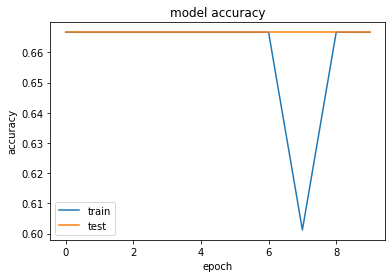

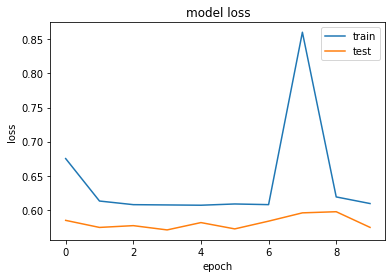

In [74]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()

As we can see  we can use the limit of 2 epochs because after that accuracy stays the same

### Summary table

| Algorithm | Accuracy | F1 Macro         
| - |------------- | -
| Vader | 0.49 | 0.48
| TextBlob | 0.43 | 0.39
| SVM | 0.65 | 0.62
| Keras | 0.67 | 


## 4.3 Covid-19 Drugs  Sentiment Analysis   <a name="sentiment_analysis_drug"></a>

For this project I decided to choose the SVM Model for the Sentiment definition from the tested models above. <br/>
Now we are going to iterate over all sentences with Drugs Names and define Positive, Neutral or Negative sentiment for each sentence.

In [82]:
def score_category_to_number(category):
        return 1 if category == 'positive' else -1 if category == 'negative' else 0

In [83]:
drugs_scores ={}
drugs_scores_num ={}
drugs_scores_document ={}
for key, sentences in drugs_sentences_result.items():
    drugs_scores_document_num ={}
    for sentence in sentences:   
         snts = []
         snts.append(sentence)
         prediction = svm_learner.predict(snts)
         combined_score = score_category_to_number(prediction)
         tokenized_text = nltk.word_tokenize(sentence)
         tokens_cleaned = remove_noise(tokenized_text, stop_words)
         # check Drugs
         for drug in drugs_unique_lower_wstop:
             if drug in tokens_cleaned:
                  if drug not in drugs_scores:
                    drugs_scores[drug] = combined_score
                  else:
                    drugs_scores[drug] += combined_score
                    
                  if drug not in drugs_scores_num:
                    drugs_scores_num[drug] = 1
                  else:
                    drugs_scores_num[drug] += 1
                  
                  if drug not in drugs_scores_document_num:
                    drugs_scores_document_num[drug] = 1
                    
    # count documents with drug mentioned
    for key, value in drugs_scores_document_num.items():
        if key not in drugs_scores_document:
             drugs_scores_document[key] = 1
        else:
             drugs_scores_document[key] += 1

In [84]:
document_count = len(drugs_sentences_result)
print("Total number of document: ", document_count)

Total number of document:  1820


### Calculate normalized score for Drugs

Now we calculate the *Normalized sentiment score* : <br/> 

&nbsp;&nbsp;&nbsp;&nbsp; **(Summary Score / Number of Scores) * (Number of Document with drug mentioned / Total Number of Documents)**
<br/>

and show Top-20 Drugs names with the highest normalized scores

In [85]:
# Normalize Score
drugs_scores_normalized ={}
for key, value in drugs_scores.items():
    #total drug's score
    score = drugs_scores[key]
    
    #number of drug's scores
    count = drugs_scores_num[key]
    if count == 0:
        count = 1
    
    #number of document with the drug mentioned
    doc_count = drugs_scores_document[key]
    
    # Normalized score = summary score divided by number of scores and muplitly  
    # the number of document with drug mentioned divided by total number of documents
    norm_score = round((score / count) * (doc_count/document_count) * 100,2)
    drugs_scores_normalized[key] = [norm_score, round((score / count) * 100,2), doc_count]
    
# Check Top 20 Drugs with highest normalized score
drugs_scores_top = sorted(drugs_scores_normalized.items(), key=itemgetter(1), reverse = True) 

## 4.4 Covid-19 Drugs Final Scores   <a name="sentiment_analysis_final"></a>

And finally we will display a WordCloud chart with the Drugs Names

In [86]:
# Convert dictionary into Dataframe
# sentiment statistics per drug
df = pd.DataFrame([drugs_scores_normalized.keys(), drugs_scores_normalized.values()]).T
df.columns = ['drug', 'score']
df1 = pd.DataFrame(df['score'].to_list(), columns=[ 'normalized score', 'scores', 'documents'])
df = pd.merge(df, df1, left_index=True, right_index=True)
df
del df['score']
final_df = df.sort_values(by=['normalized score', 'scores', 'documents' ], ascending=False)
final_df.head(10)

,drug,normalized score,scores,documents
3,chloroquine,14.16,73.86,349
4,remdesivir,12.74,69.60,333
25,hydroxychloroquine,11.00,58.03,345
26,tocilizumab,5.78,70.55,149
15,lopinavir,5.77,68.18,154
16,ritonavir,5.07,70.39,131
71,azithromycin,4.46,48.90,166
39,ribavirin,3.91,56.50,126
53,arbidol,3.40,71.22,87
36,oseltamivir,2.57,47.20,99


In [87]:
data = dict(zip(final_df['drug'].tolist(), final_df['normalized score'].tolist()))

## 4.5 Covid-19 Drugs Final Scores WordCloud   <a name="sentiment_analysis_wordcloud"></a>

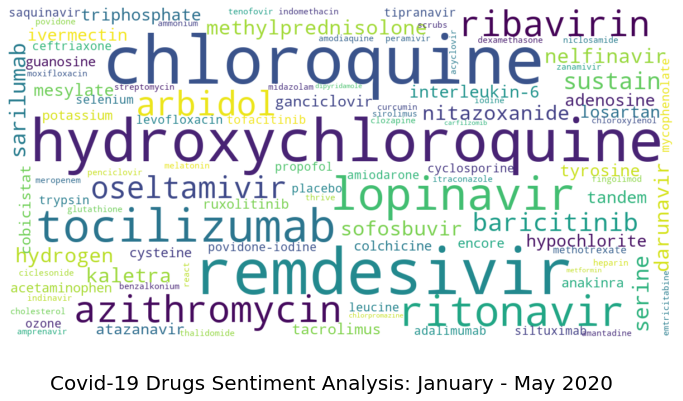

In [88]:
wordcloud = WordCloud(
        background_color='white',
        max_words=100,
        max_font_size=40, 
        scale=3,
        random_state=1 
    ).generate_from_frequencies(data)
fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')
fig.suptitle("Covid-19 Drugs Sentiment Analysis: January - May 2020", fontsize=20)
fig.subplots_adjust(top=2.3)

plt.imshow(wordcloud,cmap=plt.cm.gray, interpolation='bilinear')
plt.show()


Save final results with Drugs' Scores to CSV file

In [89]:
final_df.to_csv(FORMATTED_FILES_DIR + "Drugs Score.csv", encoding='utf-8', index=False)

## 5. Results and Discussion <a name="results"></a>

During the analysis, we defined the Top Drug Names with positive notation for Covid-19 treatments<br/>
 - Medical Domain is extremly complex - it's not quite clear for a human without medical education to understand some sentence's sentiment;
 - I have not found any labeled datasets for the Sentiments analysis in Medical Domain. Existing pre-trained models based on the data from social media (tweets, movies/hotels reviews) and do not fit for medical documents.  So if you know it - please let me know;
 - Good normalized medical entities (drugs, symptoms, diseases names) are not easy to get and use AS-IS;
 - NTLK sentence paser is not very good for this medical corpus documents.
 
### Limitations

- Drugs names numbers limited by the RxNav Rest API results and not very accurate. I can't get a list of only drugs;
- Supervised Machine Learning - Model training was done on 500 sentences labeled by me (I am not a doctor and some labels may be wrong).

## 6. Conclusion <a name="conclusion"></a>

To conclude, the basic document analysis was performed to identify Top Drugs Names which have positive sentiments related Covid-19 treatment. <br/>

During the analysis, we cleansed and investigated CORD-19 dataset, found some statistical characteristics  and visualize them.<br/>

The aim of this project is to found the Drugs Names which likely help against COVID-19 based on positive characterictics stated about the particular drug in the Medical Documents extracted from the different sources like PubMed, WHO, and other.




### Areas of improvement
- Parse Drugs Names from the special document's sections only or add a weight to the score based on the section's name;
- Improve Machine Learning and Deep Learning Models for Sentiment Analysis;
- Got a good normalized list of the Drugs Names;
- Improve sentence splitting/detection;
- Clear initial documents better - remove http://, [5], (12,43) and so on, remove non-English sentences/documents;
- Find or create Labeled Sentiment dataset(s) for Medical Domain related Drugs Treatment at least. There is one dataset with Persons' Drugs reviews but it is not suits for this kind of investigation  - how a Drug treats a disease.


## 7. References <a name="references"></a>

1. Fine-grained Sentiment Analysis in Python (Part 1) - https://towardsdatascience.com/fine-grained-sentiment-analysis-in-python-part-1-2697bb111ed4
2. Python for NLP: Creating Multi-Data-Type Classification Models with Keras - https://stackabuse.com/python-for-nlp-creating-multi-data-type-classification-models-with-keras/
3. CORD-19: EDA, parse JSON and generate clean CSV - https://www.kaggle.com/xhlulu/cord-19-eda-parse-json-and-generate-clean-csv
4. COVID Knowledge Distiller - https://www.kaggle.com/ravikiranbhaskar/covid-knowledge-distiller
5. CORD-19: Explore Drugs Being Developed - https://www.kaggle.com/maria17/cord-19-explore-drugs-being-developed
6. Sentiment Analysis - https://monkeylearn.com/sentiment-analysis/

Thank you! <br/>
This notebook was created by *Siarhei Vasiaichau*. <br/>
Email: gmlvsv@gmail.com